# Download Data

## Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import datetime as dt
import os
import seaborn as sns

In [93]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
os.chdir('/Users/maris/Documents/FE800')

In [132]:
sns.set_theme()
sns.set_palette("tab20")
sns.set_style("darkgrid", rc = {"grid.color": "white"})
c10 = sns.color_palette("tab10").as_hex()[:]
c20 = sns.color_palette("tab20").as_hex()[:]

In [33]:
pd.set_option('display.max_columns', None)

# ETF/Stock Data

## LQD Prices

In [86]:
hist = yf.download("LQD", "2018-07-01", "2023-07-01")
hist.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,114.410004,114.410004,114.160004,114.239998,96.861351,4806200
2018-07-03,114.309998,114.730003,114.309998,114.660004,97.217461,2518100
2018-07-05,114.769997,115.029999,114.750000,115.019997,97.522713,4730600
2018-07-06,115.239998,115.279999,115.089996,115.180000,97.658379,2465600
2018-07-09,115.089996,115.300003,115.029999,115.260002,97.726189,5161600


In [85]:
hist_SPY = yf.download("SPY", "2018-07-01", "2023-07-01")
hist_SPY.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,269.510010,272.040009,269.239990,271.859985,248.965240,63554800
2018-07-03,272.869995,272.980011,270.420013,270.899994,248.086151,42187100
2018-07-05,272.170013,273.179993,270.959991,273.109985,250.110016,56925900
2018-07-06,273.140015,275.839996,272.709991,275.420013,252.225571,66493700
2018-07-09,276.549988,277.959991,276.500000,277.899994,254.496658,50550400


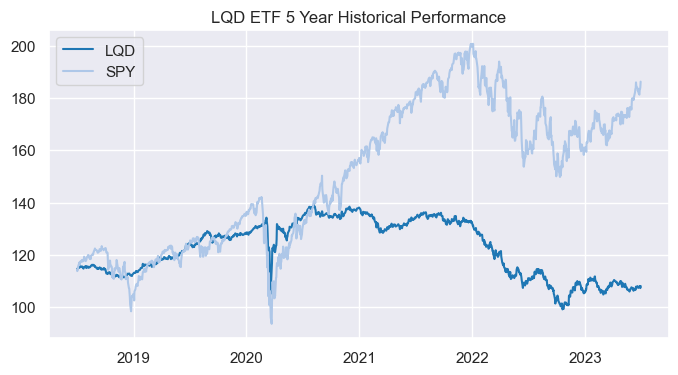

In [87]:
plt.figure(figsize = [8,4])
plt.plot(hist["Close"], label = "LQD")
plt.plot(hist_SPY["Close"] * hist["Close"][0]/hist_SPY["Close"][0], label = "SPY")
plt.title("LQD ETF 5 Year Historical Performance")
plt.legend()
plt.show()

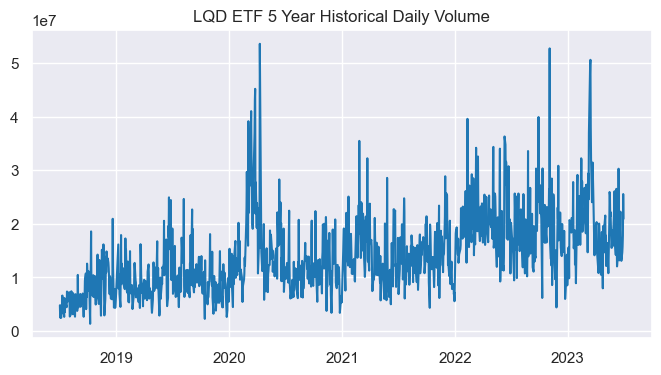

In [88]:
plt.figure(figsize = [8,4])
plt.plot(hist["Volume"])
plt.title("LQD ETF 5 Year Historical Daily Volume")
plt.show()

In [51]:
df_etfs = pd.DataFrame({"LQD": hist["Close"], "SPY": hist_SPY["Close"]})
df_etfs["LQD_return"] = df_etfs["LQD"].pct_change()
df_etfs["SPY_return"] = df_etfs["SPY"].pct_change()
df_etfs.head()

,LQD,SPY,LQD_return,SPY_return
Date,,,,
2018-10-24 00:00:00-04:00,96.578720,244.076004,NaN,NaN
2018-10-25 00:00:00-04:00,96.458946,248.454834,-0.001240,0.017940
2018-10-26 00:00:00-04:00,96.621498,244.085205,0.001685,-0.017587
2018-10-29 00:00:00-04:00,96.510254,242.732956,-0.001151,-0.005540
2018-10-30 00:00:00-04:00,96.296410,246.329880,-0.002216,0.014818


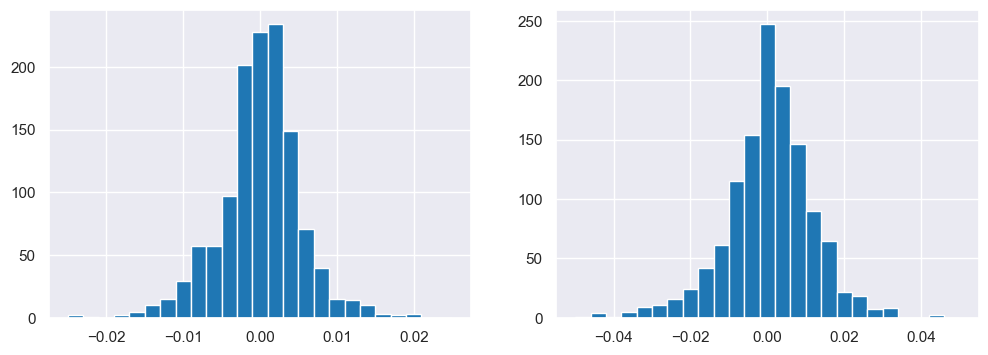

In [52]:
fig, ax = plt.subplots(1, 2, figsize = [12,4])
ax[0].hist(df_etfs["LQD_return"], bins = 25, range = [-.025, .025])
ax[1].hist(df_etfs["SPY_return"], bins = 25, range = [-.05, .05])
plt.show()

In [359]:
df_etfs[["LQD_return", "SPY_return"]].corr()

,LQD_return,SPY_return
LQD_return,1.000000,0.326101
SPY_return,0.326101,1.000000


## LQD Holdings

In [190]:
df_LQD_09262023 = pd.read_csv('LQD_holdings-2.csv')
df_LQD_09262023.columns = ['Name', 'Sector', 'Asset_Class', 'Market_Value', 'Weight',
       'Notional', 'Par', 'CUSIP', 'ISIN', 'SEDOL', 'Price',
       'Location', 'Exchange', 'Currency', 'Duration', 'YTM', 'FX_Rate',
       'Maturity', 'Coupon', 'Mod_Duration', 'YTC',
       'YTW', 'Real_Duration', 'Real_YTM',
       'Market_Currency', 'Accrual_Date', 'Effective_Date']

In [191]:
df_LQD_09262023 = df_LQD_09262023.sort_values("Weight", ascending = False)
df_LQD_09262023 = df_LQD_09262023.drop(["SEDOL", "Exchange", "Currency", "Market_Currency"], axis = 1)
df_LQD_09262023 = df_LQD_09262023.reset_index().drop(["index"], axis = 1)
df_LQD_09262023.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,Location,Duration,YTM,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date
0,BLK CSH FND TREASURY SL AGENCY,Cash and/or Derivatives,Money Market,"117,460,000.23",0.39,"117,460,000.23","117,460,000.00",66922477,US0669224778,1.00,United States,0.03,5.11,1.0,-,5.34,0.04,-,5.11,0.04,5.11,-,4-Feb-09
1,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,United States,14.16,5.72,1.0,19-May-53,5.30,14.13,-,5.72,14.13,5.72,19-May-23,19-May-23
2,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,Belgium,12.67,5.80,1.0,1-Feb-46,4.90,12.78,-,5.80,12.78,5.80,1-Feb-19,13-May-19
3,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,United States,8.83,6.55,1.0,1-Oct-37,6.75,8.74,-,6.55,8.74,6.55,3-Oct-07,3-Oct-07
4,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,United States,12.87,6.38,1.0,25-Mar-48,5.05,12.92,-,6.38,12.92,6.38,9-Mar-18,9-Mar-18


In [192]:
df_LQD_09262023.tail()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,Location,Duration,YTM,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date
2684,APPLIED MATERIALS INC,Technology,Fixed Income,"1,262,666.98",0.00,"1,262,666.98","1,456,000.00",038222AM7,US038222AM71,84.61,United States,13.3,5.53,1.0,1-Apr-47,4.35,13.42,-,5.53,13.42,5.53,31-Mar-17,31-Mar-17
2685,LAM RESEARCH CORPORATION,Technology,Fixed Income,"1,268,515.57",0.00,"1,268,515.57","1,444,000.00",512807AT5,US512807AT55,87.70,United States,13.6,5.81,1.0,15-Mar-49,4.88,13.68,-,5.81,13.68,5.81,4-Mar-19,4-Mar-19
2686,USD CASH,Cash and/or Derivatives,Cash,"-24,555,802.99",-0.08,"-24,555,802.99","-24,555,803.00",-,-,100.00,United States,0.0,5.34,1.0,-,0.00,0.00,-,5.34,0.00,5.34,-,1-Jan-89
2687,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2688,The content contained herein is owned or licen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df_LQD_09262023.groupby("Asset_Class").agg(["count", "sum"])[["Weight"]].sort_values(('Weight',   'sum'), ascending = False)

Weight       
              count    sum
Asset_Class               
Fixed Income   2685  99.84
Money Market      1   0.39
Cash              1  -0.08

In [194]:
df_LQD_09262023_notbond = pd.concat([df_LQD_09262023.iloc[0], 
                                     df_LQD_09262023.iloc[2686]], axis = 1).T.reset_index().drop(["index"], axis = 1)
df_LQD_09262023_notbond

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,Location,Duration,YTM,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date
0,BLK CSH FND TREASURY SL AGENCY,Cash and/or Derivatives,Money Market,"117,460,000.23",0.39,"117,460,000.23","117,460,000.00",66922477,US0669224778,1.0,United States,0.03,5.11,1.0,-,5.34,0.04,-,5.11,0.04,5.11,-,4-Feb-09
1,USD CASH,Cash and/or Derivatives,Cash,"-24,555,802.99",-0.08,"-24,555,802.99","-24,555,803.00",-,-,100.0,United States,0.0,5.34,1.0,-,0.0,0.0,-,5.34,0.0,5.34,-,1-Jan-89


In [195]:
df_LQD_09262023_bond = df_LQD_09262023.iloc[1:2686].reset_index().drop(["index"], axis = 1)
df_LQD_09262023_bond["Maturity"] = df_LQD_09262023_bond["Maturity"].apply(pd.Timestamp)
df_LQD_09262023_bond["Accrual_Date"] = df_LQD_09262023_bond["Accrual_Date"].apply(pd.Timestamp)
df_LQD_09262023_bond["Effective_Date"] = df_LQD_09262023_bond["Effective_Date"].apply(pd.Timestamp)
df_LQD_09262023_bond["TTM"] = df_LQD_09262023_bond["Maturity"].apply(lambda x: 
                                                                     round((x - pd.Timestamp(dt.datetime.today().date())).days/365, 4))
df_LQD_09262023_bond = df_LQD_09262023_bond.replace("Brokerage/Asset Managers/Exchanges", "Asset Managers")
df_LQD_09262023_bond.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,Location,Duration,YTM,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date,TTM
0,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,United States,14.16,5.72,1.0,2053-05-19,5.30,14.13,-,5.72,14.13,5.72,2023-05-19,2023-05-19,29.5918
1,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,Belgium,12.67,5.80,1.0,2046-02-01,4.90,12.78,-,5.80,12.78,5.80,2019-02-01,2019-05-13,22.2932
2,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,United States,8.83,6.55,1.0,2037-10-01,6.75,8.74,-,6.55,8.74,6.55,2007-10-03,2007-10-03,13.9507
3,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,United States,12.87,6.38,1.0,2048-03-25,5.05,12.92,-,6.38,12.92,6.38,2018-03-09,2018-03-09,24.4384
4,T-MOBILE USA INC,Communications,Fixed Income,"62,092,244.65",0.21,"62,092,244.65","68,427,000.00",87264ABF1,US87264ABF12,89.01,United States,5.52,5.92,1.0,2030-04-15,3.88,5.52,-,5.92,5.52,5.92,2021-04-15,2021-05-21,6.4822


In [196]:
df_LQD_09262023_bond.groupby("Sector")[["Weight"]].agg(["count", "sum"]).sort_values(('Weight',   'sum'), ascending = False).T

Sector        Banking  Consumer Non-Cyclical  Communications  Technology  \
Weight count    509.0                 471.00          270.00       314.0   
       sum       24.4                  17.69           12.27        11.3   

Sector        Energy  Consumer Cyclical  Capital Goods  Insurance  Electric  \
Weight count  240.00             212.00         137.00     135.00    130.00   
       sum      7.94               6.91           4.42       4.18      3.33   

Sector        Basic Industry  Transportation  Asset Managers  Reits  \
Weight count           68.00           67.00           44.00  43.00   
       sum              2.06            1.78            1.33   1.02   

Sector        Finance Companies  Natural Gas  Owned No Guarantee  \
Weight count              17.00        15.00                8.00   
       sum                 0.59         0.34                0.11   

Sector        Utility Other  Industrial Other  
Weight count           3.00              2.00  
       sum             0.09              0.08

In [21]:
df_LQD_09262023_bond["TTM_Range"] = pd.cut(df_LQD_09262023_bond["TTM"], 
                                           [0, 3, 5, 7, 10, 15, 20, 100],
                                          labels = ["2-3 Years", "3-5 Years", "5-7 Years", "7-10 Years", 
                                                    "10-15 Years", "15-20 Years", "20+ Years"])
df_LQD_09262023_bond.head()

,Name,Sector,Asset_Class,Market_Value,Weight,Notional,Par,CUSIP,ISIN,Price,Location,Duration,YTM,FX_Rate,Maturity,Coupon,Mod_Duration,YTC,YTW,Real_Duration,Real_YTM,Accrual_Date,Effective_Date,TTM,TTM_Range
0,PFIZER INVESTMENT ENTERPRISES PTE,Consumer Non-Cyclical,Fixed Income,"89,007,554.69",0.30,"89,007,554.69","92,844,000.00",716973AG7,US716973AG71,94.00,United States,14.16,5.72,1.0,2053-05-19,5.30,14.13,-,5.72,14.13,5.72,2023-05-19,2023-05-19,29.6000,20+ Years
1,ANHEUSER-BUSCH COMPANIES LLC,Consumer Non-Cyclical,Fixed Income,"83,824,691.11",0.28,"83,824,691.11","93,649,000.00",03522AAJ9,US03522AAJ97,88.76,Belgium,12.67,5.80,1.0,2046-02-01,4.90,12.78,-,5.80,12.78,5.80,2019-02-01,2019-05-13,22.3014,20+ Years
2,GOLDMAN SACHS GROUP INC/THE,Banking,Fixed Income,"75,296,859.48",0.25,"75,296,859.48","71,627,000.00",38141GFD1,US38141GFD16,101.84,United States,8.83,6.55,1.0,2037-10-01,6.75,8.74,-,6.55,8.74,6.55,2007-10-03,2007-10-03,13.9589,10-15 Years
3,CVS HEALTH CORP,Consumer Non-Cyclical,Fixed Income,"63,965,861.13",0.22,"63,965,861.13","76,499,000.00",126650CZ1,US126650CZ11,83.60,United States,12.87,6.38,1.0,2048-03-25,5.05,12.92,-,6.38,12.92,6.38,2018-03-09,2018-03-09,24.4466,20+ Years
4,T-MOBILE USA INC,Communications,Fixed Income,"62,092,244.65",0.21,"62,092,244.65","68,427,000.00",87264ABF1,US87264ABF12,89.01,United States,5.52,5.92,1.0,2030-04-15,3.88,5.52,-,5.92,5.52,5.92,2021-04-15,2021-05-21,6.4904,5-7 Years


In [22]:
df_LQD_09262023_bond.groupby("TTM_Range")[["Weight"]].agg(["count", "sum"]).sort_values(('Weight',   'sum'), ascending = False).T

TTM_Range     20+ Years  3-5 Years  5-7 Years  7-10 Years  15-20 Years  \
Weight count     766.00     548.00     456.00      465.00       238.00   
       sum        26.11      20.68      18.37       17.37         9.08   

TTM_Range     10-15 Years  2-3 Years  
Weight count       178.00      31.00  
       sum           7.91       0.23

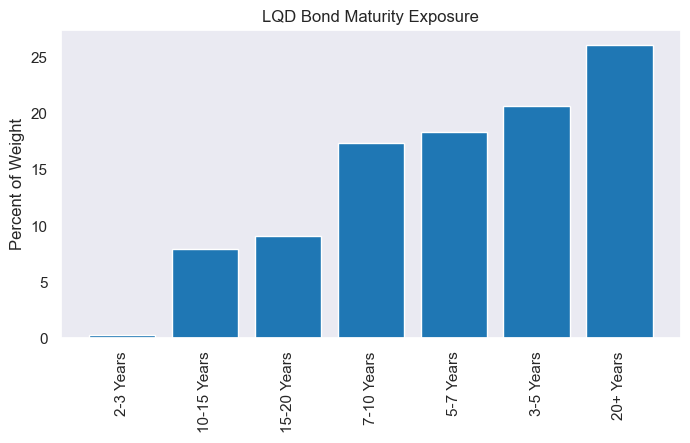

In [23]:
plt.figure(figsize = [8,4])
plt.bar(df_LQD_09262023_bond.groupby("TTM_Range")[["Weight"]].sum().sort_values("Weight").index, 
        df_LQD_09262023_bond.groupby("TTM_Range")[["Weight"]].sum().sort_values("Weight")["Weight"])
plt.ylabel('Percent of Weight')
plt.xticks(rotation=90)
plt.title('LQD Bond Maturity Exposure')
plt.show()

In [36]:
bond_bloomberg = pd.read_csv("LQD_bloomberg.csv")
bond_bloomberg["Cusip"] = bond_bloomberg["Cusip"].apply(lambda x: x[:-5])
bond_bloomberg = bond_bloomberg.dropna(how = "all", axis = 1)
bond_bloomberg.sort_values("Liquidity Score", ascending = False).head()

,Cusip,Amount Issued,Sector,Moody Rating,S&P Rating,Fitch Rating,Liquidity Score
18,126650CX6,9000000000,"Consumer, Non-cyclical",Baa2,BBB,NaN,81.0
28,716973AC6,4000000000,"Consumer, Non-cyclical",A1,A+,Au,80.0
42,38141GYM0,4250000000,Financial,A2,BBB+,A,80.0
4,87264ABF1,7000000000,Communications,Baa2,BBB,BBB+,80.0
16,06051GHD4,5989208000,Financial,A1,A-,AA-,80.0


In [37]:
df_characteristics = pd.concat([df_LQD_09262023_bond, bond_bloomberg], axis = 1)
df_characteristics = df_characteristics[["Name", "CUSIP", "Maturity", "TTM", "Coupon", "Weight", "Notional", "Par", 
                                         "Amount Issued", "Sector", "Location", "Accrual_Date", "Effective_Date",
                                         "Moody Rating", "S&P Rating", "Fitch Rating", "Liquidity Score", "TTM_Range"]]
df_characteristics.columns = ["Company", "Cusip", "Maturity", "TTM", "Coupon", "Weight", "Notional", "Par", 
                              "Amount_Issued", "Sector_LQD", "Sector_BB", "Location", "Accrual_Date", "Effective_Date",
                              "Moody_Rating", "S&P_Rating", "Fitch_Rating", "Liquidity_Score", "TTM_Range"]
df_characteristics.head()

,Company,Cusip,Maturity,TTM,Coupon,Weight,Notional,Par,Amount_Issued,Sector_LQD,Sector_BB,Location,Accrual_Date,Effective_Date,Moody_Rating,S&P_Rating,Fitch_Rating,Liquidity_Score,TTM_Range
0,PFIZER INVESTMENT ENTERPRISES PTE,716973AG7,2053-05-19,29.6000,5.30,0.30,"89,007,554.69","92,844,000.00",6000000000,Consumer Non-Cyclical,"Consumer, Non-cyclical",United States,2023-05-19,2023-05-19,A1,A+,Au,67.0,20+ Years
1,ANHEUSER-BUSCH COMPANIES LLC,03522AAJ9,2046-02-01,22.3014,4.90,0.28,"83,824,691.11","93,649,000.00",9518964000,Consumer Non-Cyclical,"Consumer, Non-cyclical",Belgium,2019-02-01,2019-05-13,A3,A-,WD,75.0,20+ Years
2,GOLDMAN SACHS GROUP INC/THE,38141GFD1,2037-10-01,13.9589,6.75,0.25,"75,296,859.48","71,627,000.00",5545000000,Banking,Financial,United States,2007-10-03,2007-10-03,Baa2,BBB,BBB+,60.0,10-15 Years
3,CVS HEALTH CORP,126650CZ1,2048-03-25,24.4466,5.05,0.22,"63,965,861.13","76,499,000.00",8000000000,Consumer Non-Cyclical,"Consumer, Non-cyclical",United States,2018-03-09,2018-03-09,Baa2,BBB,NaN,73.0,20+ Years
4,T-MOBILE USA INC,87264ABF1,2030-04-15,6.4904,3.88,0.21,"62,092,244.65","68,427,000.00",7000000000,Communications,Communications,United States,2021-04-15,2021-05-21,Baa2,BBB,BBB+,80.0,5-7 Years


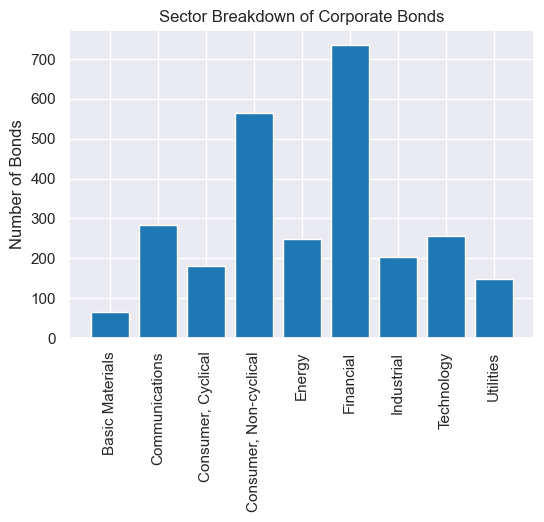

In [206]:
plt.figure(figsize = [6,4])
plt.bar(df_characteristics.groupby("Sector_BB").count().index, df_characteristics.groupby("Sector_BB").count()["Cusip"])
plt.ylabel('Number of Bonds')
plt.xticks(rotation=90)
plt.title('Sector Breakdown of Corporate Bonds')
plt.show()

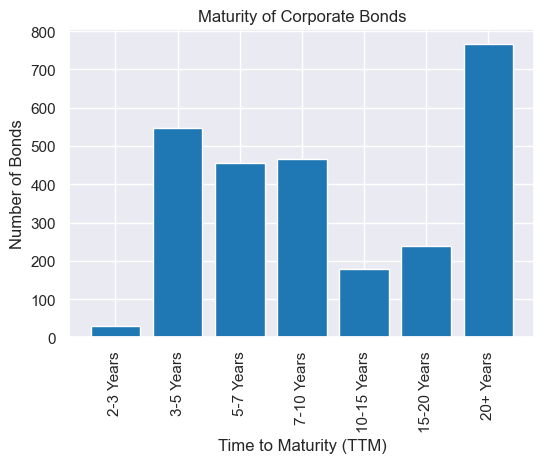

In [207]:
plt.figure(figsize = [6,4])
plt.bar(df_characteristics.groupby("TTM_Range").count().index, df_characteristics.groupby("TTM_Range").count()["Cusip"])
plt.xlabel('Time to Maturity (TTM)')
plt.ylabel('Number of Bonds')
plt.xticks(rotation=90)
plt.title('Maturity of Corporate Bonds')
plt.show()

# WRDS Data

In [226]:
raw_data = pd.read_csv('gvj3rncyix0ecmwx.csv')

In [227]:
raw_data.head() 

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,wis_fl,cmsn_trd,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,days_to_sttl_ct,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,diss_rptg_side_cd,side,chng_cd,rptd_high_pr,high_yld_sign_cd,high_yld_pt,rptd_low_pr,low_yld_sign_cd,low_yld_pt,rptd_last_pr,lsal_yld_sign_cd,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,rptg_party_type,contra_party_type,ATS_indicator
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,CORP,2019-08-07,62878,M,NaN,NaN,M,1MM+,E,101.616,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,CORP,2019-08-07,62880,M,NaN,NaN,M,1MM+,E,101.599,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,CORP,2019-08-07,62877,M,NaN,NaN,M,1MM+,E,101.289,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,CORP,2019-08-07,62879,M,NaN,NaN,M,1MM+,E,100.163,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,CORP,2019-08-07,62881,M,NaN,NaN,M,1MM+,E,102.015,NaN,NaN,NaN,NaN,Z,NaN,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN


In [30]:
column_description = pd.read_csv("data_description.csv")
column_description["Variable Name"] = column_description["Variable Name"].apply(lambda x: x.lower())
column_description

,Variable Name,Type,Description
0,bond_sym_id,string,TRACE Bond Symbol (BOND_SYM_ID)
1,company_symbol,string,Company Symbol (issuer stock ticker) (COMPANY_...
2,cusip_id,string,CUSIP (CUSIP_ID)
3,bsym,string,Bloomberg ID (BSYM)
4,trd_exctn_dt,date,Execution Date (TRD_EXCTN_DT)
5,trd_exctn_tm,double,Execution Time (TRD_EXCTN_TM)
6,rptd_pr,double,Price (RPTD_PR)
7,ascii_rptd_vol_tx,string,Quantity (ASCII_RPTD_VOL_TX)
8,frmt_cd,string,Quantity Indicator (FRMT_CD)
9,yld_pt,double,Yield (YLD_PT)


In [31]:
column_description.to_csv("column_description.csv")

In [229]:
null_columns = raw_data.columns[raw_data.isna().all()].tolist()
null_columns

['wis_fl',
 'cmsn_trd',
 'days_to_sttl_ct',
 'diss_rptg_side_cd',
 'low_yld_sign_cd',
 'lsal_yld_sign_cd']

In [230]:
raw_data = raw_data.drop(null_columns, axis = 1)
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,sub_prd_type,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_sign_cd,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,sttl_dt,rptg_party_type,contra_party_type,ATS_indicator
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,CORP,2019-08-07,62878,M,M,1MM+,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,CORP,2019-08-07,62880,M,M,1MM+,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,CORP,2019-08-07,62877,M,M,1MM+,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,CORP,2019-08-07,62879,M,M,1MM+,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,CORP,2019-08-07,62881,M,M,1MM+,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-21,D,C,NaN


In [231]:
useless_columns = ["sub_prd_type", "high_yld_sign_cd", "sttl_dt", "ATS_indicator"]

In [232]:
raw_data = raw_data.drop(useless_columns, axis = 1)
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,rptg_party_type,contra_party_type
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,2019-08-07,62878,M,M,1MM+,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,2019-08-07,62880,M,M,1MM+,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,2019-08-07,62877,M,M,1MM+,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,2019-08-07,62879,M,M,1MM+,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,2019-08-07,62881,M,M,1MM+,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C


In [233]:
raw_data.shape

(18141204, 32)

In [234]:
raw_data["trd_exctn_dt"] = raw_data["trd_exctn_dt"].apply(pd.Timestamp)
raw_data["trans_dt"] = raw_data["trans_dt"].apply(pd.Timestamp)

In [235]:
raw_data["trd_exctn_tm"] = raw_data["trd_exctn_tm"].apply(lambda x: pd.Timestamp(x).time())                      

In [236]:
raw_data["trd_datetime"] = raw_data.apply(lambda x : dt.datetime.combine(x['trd_exctn_dt'],x['trd_exctn_tm']),1)

In [237]:
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,rptg_party_type,contra_party_type,trd_datetime
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,2019-08-07,62878,M,M,1MM+,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:11:55
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,2019-08-07,62880,M,M,1MM+,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:12:04
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,2019-08-07,62877,M,M,1MM+,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:13:39
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,2019-08-07,62879,M,M,1MM+,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:18:35
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,2019-08-07,62881,M,M,1MM+,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:22:10


In [238]:
function_dictionary = {'company_symbol':["nunique", pd.Series.mode],'trd_exctn_dt':['min', 'max'], "rptd_pr": ['min', 'max', "count"]}

In [239]:
raw_data_summary = raw_data.groupby(["cusip_id"])[["company_symbol", "trd_exctn_dt", "rptd_pr"]].agg(function_dictionary)
raw_data_summary.columns = ["num_companies", "company_symbol", "first_trade", "last_trade", "min_price", "max_price", "trades"]
raw_data_summary.head()

,num_companies,company_symbol,first_trade,last_trade,min_price,max_price,trades
cusip_id,,,,,,,
00130HCG8,1,AES,2021-08-16,2023-06-30,74.395,109.911,2064
00130HCH6,1,AES,2023-05-15,2023-06-30,97.835,101.240,645
00206RBH4,1,T,2018-07-02,2023-06-30,74.918,133.511,18534
00206RBK7,1,T,2018-07-02,2023-06-30,73.133,121.412,13332
00206RCP5,1,T,2018-07-02,2023-06-30,79.723,133.289,26275


In [240]:
def convert_to_numeric(value):
    if 'MM' in value:
        return float(value.replace('MM+', '')) * 1e6
    elif 'M' in value:
        return float(value.replace('M+', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K+', '')) * 1e3
    else:
        return float(value)

In [241]:
raw_data["ascii_rptd_vol_tx"] = raw_data["ascii_rptd_vol_tx"].apply(convert_to_numeric)
raw_data.head()

,cusip_id,bond_sym_id,company_symbol,bsym,trd_exctn_dt,trd_exctn_tm,trans_dt,msg_seq_nb,trc_st,remuneration,ascii_rptd_vol_tx,frmt_cd,rptd_pr,yld_sign_cd,yld_pt,asof_cd,sale_cndtn_cd,sale_cndtn2_cd,spcl_trd_fl,side,chng_cd,rptd_high_pr,high_yld_pt,rptd_low_pr,low_yld_pt,rptd_last_pr,lsal_yld_pt,orig_dis_dt,orig_msg_seq_nb,function,rptg_party_type,contra_party_type,trd_datetime
0,20268JAC7,NaN,NaN,NaN,2019-08-07,15:11:55,2019-08-07,62878,M,M,1000000.0,E,101.616,NaN,NaN,NaN,Z,NaN,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:11:55
1,20268JAC7,NaN,NaN,NaN,2019-08-07,15:12:04,2019-08-07,62880,M,M,1000000.0,E,101.599,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:12:04
2,20268JAC7,NaN,NaN,NaN,2019-08-07,15:13:39,2019-08-07,62877,M,M,1000000.0,E,101.289,NaN,NaN,NaN,Z,NaN,NaN,B,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:13:39
3,20268JAC7,NaN,NaN,NaN,2019-08-07,15:18:35,2019-08-07,62879,M,M,1000000.0,E,100.163,NaN,NaN,NaN,Z,NaN,NaN,B,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:18:35
4,20268JAC7,NaN,NaN,NaN,2019-08-07,15:22:10,2019-08-07,62881,M,M,1000000.0,E,102.015,NaN,NaN,NaN,Z,NaN,NaN,S,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,2019-08-07 15:22:10


In [242]:
raw_data.to_pickle("raw_data.pkl")

## Stock Tickers

In [39]:
stocks = raw_data.groupby(["company_symbol"])[["cusip_id"]].nunique()
stocks = stocks.sort_index()
stocks.head()

,cusip_id
company_symbol,
AAPL,38
ABBV,14
ABC,2
ABT,3
ABX,3


In [92]:
df_stocks = yf.download(list(stocks.index), "2018-07-01", "2023-07-01")
df_stocks.head()

[*********************100%%**********************]  391 of 391 completed


60 Failed downloads:
['APC', 'ATHU', 'FOXR', 'CSPE', 'WBK', 'CMCS', 'PYPLV', 'FB', 'MGLL', 'HTA', 'BT', 'ECA', 'PKI', 'UN', 'FISV', 'ELVH', 'DWDP', 'MYL', 'TOT', 'CS', 'DISC', 'VIACA', 'RABO', 'KPME', 'BBT', 'RPHC', 'UTX', 'ANTM', 'CLR', 'CZTN', 'NABZ', 'DDAI', 'RE', 'APBR', 'BBL', 'MIT', 'HPQWI', 'HRS', 'BNKQ', 'GSKC', 'TKPH', 'ARHPF', 'STJL', 'OWLO']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BRCM', 'LUK', 'FSIC', 'WMI', 'CBG', 'EDP', 'HCN', 'WAG', 'MTU', 'RDS', 'CDWC', 'ENL', 'STO', 'WSH', 'SXL', 'ABX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-01 -> 2023-07-01)')


Adj Close                                            \
                          AAPL       ABBV        ABC        ABT ABX ACHN   
Date                                                                       
2018-07-02 00:00:00  44.660511  72.200829  78.981339  55.612400 NaN  NaN   
2018-07-03 00:00:00  43.882687  72.588547  79.865860  55.439175 NaN  NaN   
2018-07-05 00:00:00  44.235813  73.263199  80.344986  55.913242 NaN  NaN   
2018-07-06 00:00:00  44.849018  75.155235  81.054459  56.669945 NaN  NaN   
2018-07-09 00:00:00  45.471756  75.248283  81.312454  56.925213 NaN  NaN   

                                                                               \
                           ADBE        ADI        ADM         ADP        ADSK   
Date                                                                            
2018-07-02 00:00:00  243.259995  87.108971  39.269848  120.948898  131.899994   
2018-07-03 00:00:00  242.009995  85.480934  39.643185  119.872681  131.600006   
2018-07-05 00:00:00  244.179993  87.190376  40.233578  119.917526  132.800003   
2018-07-06 00:00:00  248.190002  87.913940  40.554821  120.374908  135.110001   
2018-07-09 00:00:00  249.770004  87.895859  41.041019  120.643974  134.970001   

                                                                             \
                           AEE        AEP        AER        AES         AET   
Date                                                                          
2018-07-02 00:00:00  53.183750  58.559002  53.770000  11.221452  184.722885   
2018-07-03 00:00:00  53.192440  58.935184  54.139999  11.110433  184.245346   
2018-07-05 00:00:00  53.470421  59.461830  54.480000  11.076273  184.036453   
2018-07-06 00:00:00  53.887413  59.821293  54.590000  11.101892  185.250168   
2018-07-09 00:00:00  52.097836  57.572578  55.349998  10.785914  186.543442   

                                                                            \
                           AGR        AIG         AL        ALL       ALLY   
Date                                                                         
2018-07-02 00:00:00  43.560989  46.011147  38.018368  80.700890  22.948757   
2018-07-03 00:00:00  43.716805  46.278450  38.154636  80.903389  22.862711   
2018-07-05 00:00:00  44.012016  46.494026  38.408993  80.938599  23.060617   
2018-07-06 00:00:00  44.389244  46.882038  38.318161  81.132263  23.189692   
2018-07-09 00:00:00  42.822945  47.908157  39.099419  82.399971  23.852249   

                                                                              \
                          AMAT      AMCR        AMGN         AMP         AMT   
Date                                                                           
2018-07-02 00:00:00  42.799244  8.286685  158.088074  125.786064  128.505890   
2018-07-03 00:00:00  41.974739  8.010462  158.446442  124.330612  127.049110   
2018-07-05 00:00:00  42.574375  8.191978  159.854187  125.875351  129.394150   
2018-07-06 00:00:00  43.220860  8.247224  162.968353  126.509331  129.518494   
2018-07-09 00:00:00  43.586266  8.247224  165.664474  130.152451  126.294083   

                                                                      \
                          AMZN ANTM         AON APBR APC         APD   
Date                                                                   
2018-07-02 00:00:00  85.689003  NaN  130.840775  NaN NaN  137.692047   
2018-07-03 00:00:00  84.697998  NaN  130.678726  NaN NaN  137.258163   
2018-07-05 00:00:00  84.986504  NaN  131.765488  NaN NaN  137.957733   
2018-07-06 00:00:00  85.531502  NaN  133.100174  NaN NaN  138.710449   
2018-07-09 00:00:00  86.950996  NaN  135.874252  NaN NaN  139.817337   

                                                                             \
                           APH       APTV       ARCC         ARE ARHPF ATHU   
Date                                                                          
2018-07-02 00:00:00  41.299656  90.947884   9.9361

In [127]:
df_sector_etfs = yf.download(["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"],
                      start="2018-07-01", end="2023-07-01")["Adj Close"]
df_sector_etfs.head()

[*********************100%%**********************]  11 of 11 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-07-02,51.815941,47.558678,57.704597,23.967844,65.343201,66.198036,44.529408,27.258999,44.282074,76.473450,103.793655
2018-07-03,51.726246,46.976593,58.067093,23.752565,65.133850,65.414139,44.633701,27.418261,44.409000,76.656136,103.272110
2018-07-05,52.174786,47.692268,58.005371,23.806387,65.452431,66.339729,45.250847,27.778694,44.645943,77.450836,103.784210
2018-07-06,52.434933,48.446114,58.360142,23.923000,65.679970,67.114182,45.389915,27.896046,44.992886,78.565247,104.599762
2018-07-09,52.901424,48.722836,59.231651,24.470171,66.899658,67.624214,45.216068,27.636204,43.605110,79.140686,105.851524


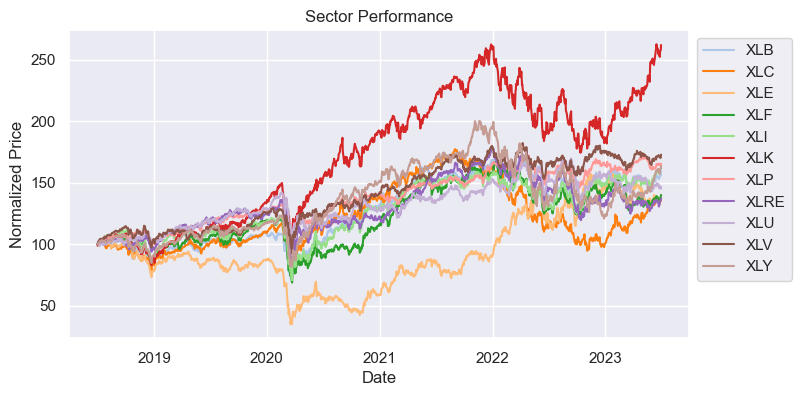

In [131]:
normalized_etf = df_sector_etfs / df_sector_etfs.iloc[0] * 100
plt.figure(figsize = [8,4])
for i in range(len(normalized_etf.columns)):
    plt.plot(normalized_etf.index, normalized_etf[normalized_etf.columns[i]], c = c[i+1], label = normalized_etf.columns[i])
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title("Sector Performance")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Macroeconomic Factor Data

In [103]:
fed_funds = pd.read_csv("fed_funds.csv").dropna(how = "all", axis = 1)
fed_funds["Effective Date"] = fed_funds["Effective Date"].apply(lambda x: pd.Timestamp(x))
fed_funds = fed_funds[fed_funds["Rate Type"] == "EFFR"]
fed_funds = fed_funds.sort_values("Effective Date").reset_index().drop(["index"], axis = 1)
fed_funds.head()

,Effective Date,Rate Type,Rate (%),1st Percentile (%),25th Percentile (%),75th Percentile (%),99th Percentile (%),Volume ($Billions),Target Rate From (%),Target Rate To (%)
0,2018-07-02,EFFR,1.91,1.89,1.90,1.92,2.06,83.0,1.75,2.0
1,2018-07-03,EFFR,1.91,1.88,1.90,1.91,2.06,88.0,1.75,2.0
2,2018-07-05,EFFR,1.91,1.88,1.90,1.91,2.06,78.0,1.75,2.0
3,2018-07-06,EFFR,1.91,1.88,1.90,1.91,2.05,80.0,1.75,2.0
4,2018-07-09,EFFR,1.91,1.89,1.91,1.91,2.06,77.0,1.75,2.0


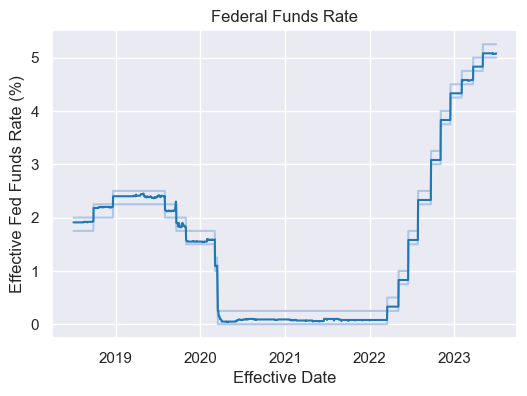

In [104]:
plt.figure(figsize = [6,4])
plt.plot(fed_funds["Effective Date"], fed_funds["Target Rate From (%)"], color = c[1])
plt.plot(fed_funds["Effective Date"], fed_funds["Target Rate To (%)"], color = c[1])
plt.plot(fed_funds["Effective Date"], fed_funds["Rate (%)"], color = c[0])
plt.xlabel("Effective Date")
plt.ylabel("Effective Fed Funds Rate (%)")
plt.title("Federal Funds Rate")
plt.show()

In [105]:
yield_curve = pd.read_csv("yieldcurve.csv")
yield_curve["DATE"] = yield_curve["DATE"].apply(lambda x: pd.Timestamp(x))
yield_curve = yield_curve[yield_curve["DGS1"] != "."]
yield_curve["DGS1"] = yield_curve["DGS1"].apply(lambda x: float(x))
yield_curve["DGS2"] = yield_curve["DGS2"].apply(lambda x: float(x))
yield_curve["DGS3"] = yield_curve["DGS3"].apply(lambda x: float(x))
yield_curve["DGS5"] = yield_curve["DGS5"].apply(lambda x: float(x))
yield_curve["DGS7"] = yield_curve["DGS7"].apply(lambda x: float(x))
yield_curve["DGS10"] = yield_curve["DGS10"].apply(lambda x: float(x))
yield_curve["DGS30"] = yield_curve["DGS30"].apply(lambda x: float(x))
yield_curve.head()

,DATE,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30
0,2018-07-02,2.34,2.57,2.65,2.75,2.83,2.87,2.99
1,2018-07-03,2.33,2.53,2.63,2.72,2.79,2.83,2.96
3,2018-07-05,2.32,2.55,2.65,2.74,2.80,2.84,2.95
4,2018-07-06,2.34,2.53,2.64,2.71,2.78,2.82,2.94
5,2018-07-09,2.34,2.57,2.66,2.75,2.82,2.86,2.96


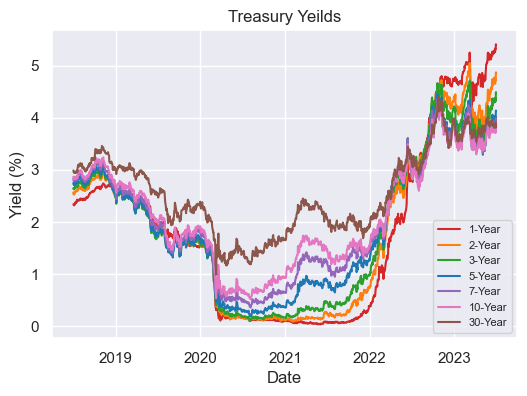

In [138]:
plt.figure(figsize = [6,4])
plt.plot(yield_curve["DATE"], yield_curve["DGS1"], label = "1-Year", color = c10[3])
plt.plot(yield_curve["DATE"], yield_curve["DGS2"], label = "2-Year", color = c10[1])
plt.plot(yield_curve["DATE"], yield_curve["DGS3"], label = "3-Year", color = c10[2])
plt.plot(yield_curve["DATE"], yield_curve["DGS5"], label = "5-Year", color = c10[0])
plt.plot(yield_curve["DATE"], yield_curve["DGS7"], label = "7-Year", color = c10[4])
plt.plot(yield_curve["DATE"], yield_curve["DGS10"], label = "10-Year", color = c10[6])
plt.plot(yield_curve["DATE"], yield_curve["DGS30"], label = "30-Year", color = c10[5])
plt.ylabel("Yield (%)")
plt.xlabel("Date")
plt.title("Treasury Yeilds")
plt.legend(loc = "lower right", fontsize = 8)
plt.show()

In [168]:
monthly_macro = pd.read_csv("Monthly.csv").dropna()
monthly_macro.columns = ["Date", "Unemployment", "CPI", "PCE", "IPI"]
monthly_macro["Date"] = monthly_macro["Date"].apply(lambda x: pd.Timestamp(x))
monthly_macro["Trading Date"] = pd.date_range("2018-07-01", "2023-07-01", freq='BMS')
monthly_macro.head()

,Date,Unemployment,CPI,PCE,IPI,Trading Date
0,2018-07-01,3.8,2.519634,5.36443,3.23564,2018-07-02
1,2018-08-01,3.8,2.432878,5.41122,4.43138,2018-08-01
2,2018-09-01,3.7,2.461933,4.47557,4.35959,2018-09-03
3,2018-10-01,3.8,2.414988,4.72653,2.91253,2018-10-01
4,2018-11-01,3.8,2.476794,4.59581,2.70690,2018-11-01


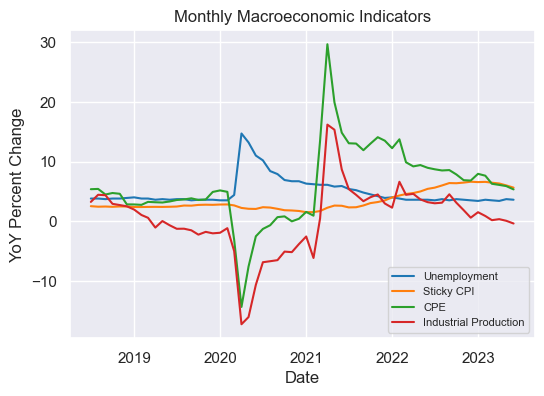

In [170]:
plt.figure(figsize = [6,4])
plt.plot(monthly_macro["Date"], monthly_macro["Unemployment"], label = "Unemployment", color = c10[0])
plt.plot(monthly_macro["Date"], monthly_macro["CPI"], label = "Sticky CPI", color = c10[1])
plt.plot(monthly_macro["Date"], monthly_macro["PCE"], label = "CPE", color = c10[2])
plt.plot(monthly_macro["Date"], monthly_macro["IPI"], label = "Industrial Production", color = c10[3])
plt.ylabel("YoY Percent Change")
plt.xlabel("Date")
plt.title("Monthly Macroeconomic Indicators")
plt.legend(loc = "lower right", fontsize = 8)
plt.show()

In [173]:
quarterly_macro = pd.read_csv("Quarterly.csv").dropna()
quarterly_macro.columns = ["Date", "GDP", "Real GDP per Capita"]
quarterly_macro["Date"] = quarterly_macro["Date"].apply(lambda x: pd.Timestamp(x))
quarterly_macro["Trading Date"] = pd.date_range("2018-07-01", "2023-07-01", freq='BMS')[::3]
quarterly_macro.head()

,Date,GDP,Real GDP per Capita,Trading Date
0,2018-07-01,1.05835,0.46628,2018-07-02
1,2018-10-01,0.57281,-0.00487,2018-10-01
2,2019-01-01,0.89046,0.43818,2019-01-01
3,2019-04-01,1.32980,0.71418,2019-04-01
4,2019-07-01,1.44732,0.98506,2019-07-01


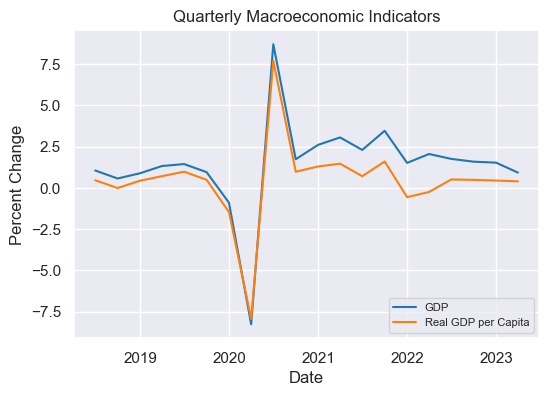

In [156]:
plt.figure(figsize = [6,4])
plt.plot(quarterly_macro["Date"], quarterly_macro["GDP"], label = "GDP", color = c10[0])
plt.plot(quarterly_macro["Date"], quarterly_macro["Real GDP per Capita"], label = "Real GDP per Capita", color = c10[1])
plt.ylabel("Percent Change")
plt.xlabel("Date")
plt.title("Quarterly Macroeconomic Indicators")
plt.legend(loc = "lower right", fontsize = 8)
plt.show()

In [179]:
macro_factors = pd.concat([fed_funds.set_index("Effective Date")[["Rate (%)", "Target Rate From (%)", "Target Rate To (%)"]],
                           yield_curve.set_index("DATE"),
                           monthly_macro.set_index("Trading Date").drop(["Date"], axis = 1),
                           quarterly_macro.set_index("Trading Date").drop(["Date"], axis = 1)], axis = 1)
macro_factors = macro_factors.ffill()
macro_factors.columns = ["EFFR", "Lower_Target", "Upper_Target", "1YRT", "2YRT", "3YRT", "5YRT", "7YRT", "10YRT", "30YRT", "Unemployment",
                         "CPI", "PCE", "IPI", "GDP", "Real_GDP_cap"]
macro_factors.head()

,EFFR,Lower_Target,Upper_Target,1YRT,2YRT,3YRT,5YRT,7YRT,10YRT,30YRT,Unemployment,CPI,PCE,IPI,GDP,Real_GDP_cap
2018-07-02,1.91,1.75,2.0,2.34,2.57,2.65,2.75,2.83,2.87,2.99,3.8,2.519634,5.36443,3.23564,1.05835,0.46628
2018-07-03,1.91,1.75,2.0,2.33,2.53,2.63,2.72,2.79,2.83,2.96,3.8,2.519634,5.36443,3.23564,1.05835,0.46628
2018-07-05,1.91,1.75,2.0,2.32,2.55,2.65,2.74,2.80,2.84,2.95,3.8,2.519634,5.36443,3.23564,1.05835,0.46628
2018-07-06,1.91,1.75,2.0,2.34,2.53,2.64,2.71,2.78,2.82,2.94,3.8,2.519634,5.36443,3.23564,1.05835,0.46628
2018-07-09,1.91,1.75,2.0,2.34,2.57,2.66,2.75,2.82,2.86,2.96,3.8,2.519634,5.36443,3.23564,1.05835,0.46628


In [180]:
macro_factors.to_pickle("macro_factors.pkl")